In [1]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import torch

##Обучение(первый вариант)

In [2]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
    else:
        print('File already present, skipping download...')

In [ ]:
if not os.path.exists('train'):
    !curl -L "https://app.roboflow.com/ds/FbZidNsdIZ?key=nccDN9nphz" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

    dirs = ['train', 'valid']

    for i, dir_name in enumerate(dirs):
        all_image_names = sorted(os.listdir(f"{dir_name}/images/"))
        for j, image_name in enumerate(all_image_names):
            if (j % 2) == 0:
                file_name = image_name.split('.jpg')[0]
                os.remove(f"{dir_name}/images/{image_name}")
                os.remove(f"{dir_name}/labels/{file_name}.txt")

In [ ]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git
!pip install -r yolov5/requirements.txt

In [ ]:
RES_DIR = 'res_dir'
!python train.py --data data.yaml --weights yolov5s.pt \
    --img 640 --epochs 18 --batch-size 8 #--name

python3: can't open file '/content/train.py': [Errno 2] No such file or directory


## Обучение (Второй вариант)

ДЛЯ ПРЕПРОЦЕССИНГА НА ИНФЕРЕНСЕ:

1) Перевести в серое с 3 каналами

In [ ]:
!pip install ultralytics
!curl -L "https://app.roboflow.com/ds/tPpvUZcSUg?key=32RKbDI8Lw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install unrar
!unrar x /content/drive/MyDrive/Test_Data.rar

In [44]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov5s.pt')  # load a pretrained model (recommended for training)

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [132]:
results = model.train(data='/content/data.yaml', epochs=30, imgsz=480, batch=32)

Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/data.yaml, epochs=30, time=None, patience=50, batch=32, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train42, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

train: Scanning /content/train/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3/3 [00:00<?, ?it/s]


Plotting labels to runs/detect/train42/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.88G      3.286      3.767       1.85         26        480: 100%|██████████| 2/2 [00:02<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all          3          3      0.978          1      0.995      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.82G      3.552      3.761      1.787         32        480: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all          3          3       0.95          1      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.65G       3.25      3.755      1.844         26        480: 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all          3          3      0.899          1      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.54G      3.377      3.634       1.77         26        480: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all          3          3      0.872          1      0.995      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.71G      3.013      3.746      1.746         23        480: 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]

                   all          3          3      0.841          1      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.56G       2.29      3.071        1.5         27        480: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.01it/s]

                   all          3          3      0.836          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.57G      1.595      2.678       1.33         34        480: 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.94it/s]

                   all          3          3      0.866          1      0.995      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.57G      1.368      2.401       1.25         30        480: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all          3          3      0.918          1      0.995      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.73G      1.328      1.992      1.245         33        480: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

                   all          3          3      0.913          1      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.73G      1.337      1.769      1.168         28        480: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]

                   all          3          3      0.946          1      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.73G      1.175      1.356       1.08         30        480: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]

                   all          3          3      0.964          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.73G      1.088      1.192      1.042         29        480: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all          3          3      0.975          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.73G      1.063      1.104      1.078         30        480: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.57it/s]

                   all          3          3       0.98          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.73G       1.12      1.159      1.044         36        480: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.31it/s]

                   all          3          3      0.982          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.74G     0.9345      1.022      1.016         33        480: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all          3          3      0.983          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.73G     0.9567       1.07      1.004         26        480: 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all          3          3      0.983          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.73G     0.8397     0.9668     0.9448         31        480: 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all          3          3      0.984          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.73G     0.9332      1.054     0.9531         28        480: 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.58it/s]

                   all          3          3      0.985          1      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.73G     0.8482     0.9205     0.9413         33        480: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.24it/s]

                   all          3          3      0.986          1      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.73G     0.8401     0.8662      0.961         33        480: 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.05it/s]

                   all          3          3      0.986          1      0.995      0.742


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.73G     0.9383      1.369     0.9753         16        480: 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all          3          3      0.986          1      0.995      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.73G      1.004      1.322     0.9648         15        480: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.48it/s]

                   all          3          3      0.986          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.73G     0.7614       1.11     0.9211         16        480: 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all          3          3      0.985          1      0.995      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.73G     0.8681      1.088     0.9249         17        480: 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all          3          3      0.985          1      0.995      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.73G      0.907      1.229     0.8968         15        480: 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          3          3      0.985          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.75G     0.9206      1.084     0.9599         18        480: 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.29it/s]

                   all          3          3      0.985          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.75G     0.7991      1.056     0.8853         17        480: 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all          3          3      0.986          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.75G     0.7853      1.047     0.9444         16        480: 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]

                   all          3          3      0.986          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.75G      0.823      1.019     0.8847         16        480: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          3          3      0.986          1      0.995      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.75G     0.7937      1.079     0.9057         17        480: 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.90it/s]

                   all          3          3      0.986          1      0.995      0.819



30 epochs completed in 0.024 hours.
Optimizer stripped from runs/detect/train42/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train42/weights/best.pt, 18.5MB

Validating runs/detect/train42/weights/best.pt...
Ultralytics YOLOv8.0.232 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9111923 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.19it/s]


                   all          3          3      0.986          1      0.995      0.819
Speed: 0.3ms preprocess, 12.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train42


##Инференс

In [133]:
def preproces(image_path):
    '''
    Читает изображение из пути, переводит в серое с 3 каналами
    '''
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image.shape
    return cv2.merge((gray_image, gray_image, gray_image))

def get_scale_img(detection_results):
    '''
    Из результатов детекции получает координаты и вырезает часть со шкалой
    из изображения
    '''
    result = detection_results[0]
    box_coord = result.boxes.xyxy.cpu().numpy().squeeze()
    box_coord = box_coord.round().astype(int)
    (x_min, y_min, x_max, y_max) = box_coord
    # Вырезаем часть со шкалой
    scale_bar = result.orig_img[y_min - 5:y_max + 5, x_min - 5:x_max +  5, :]
    return scale_bar

In [138]:
results = model([preproces('/content/Test Data/test_3.png')])


0: 384x480 1 Scale-bar, 26.0ms
Speed: 2.7ms preprocess, 26.0ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 480)


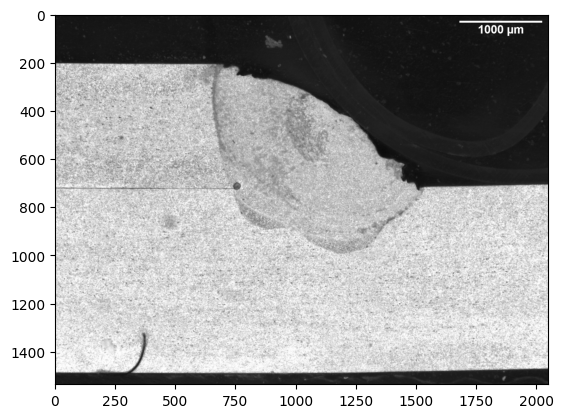

In [142]:
plt.imshow(results[0].orig_img)

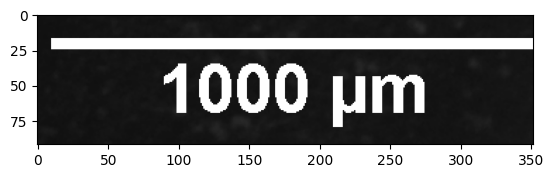

In [143]:
plt.imshow(get_scale_img(results))
plt.show()